In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import random
import scipy
import scipy.stats
from astroML.datasets import fetch_dr7_quasar

In [3]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

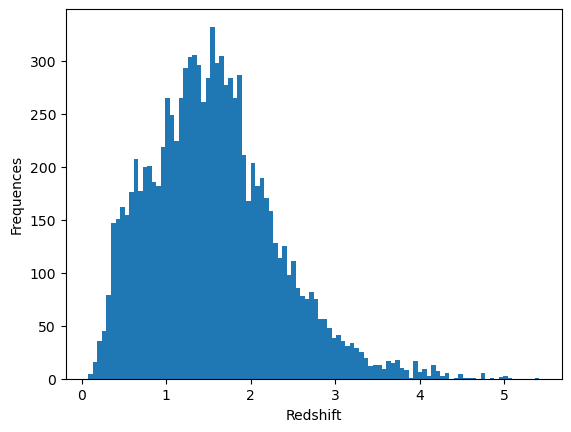

In [4]:
counts, bins = np.histogram(z, bins=100)
plt.hist(z, bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequences')
plt.show()

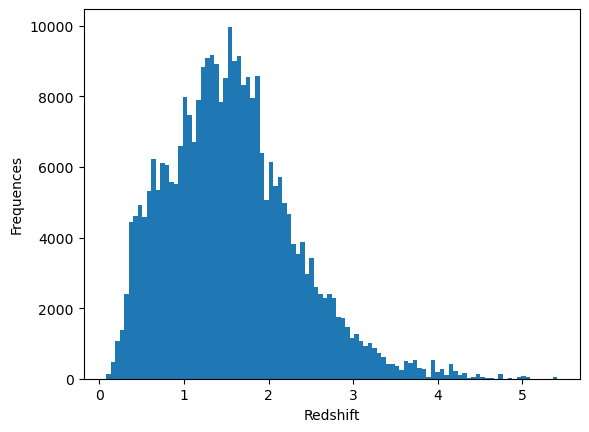

In [5]:
#REJECTION SAMPLING

N=10000
x_good=[]
y_good=[]

for i in range(len(bins)-1):
    #generating points
    x=np.random.uniform(bins[i],bins[i+1],N)
    y=np.random.uniform(0, counts.max(),N)
    
    #rejecting the points over the distribution
    for j in range(0,N):
        if(y[j]<counts[i]):
            x_good.append(x[j])
            y_good.append(y[j])

plt.hist(x_good,bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequences')
plt.show()

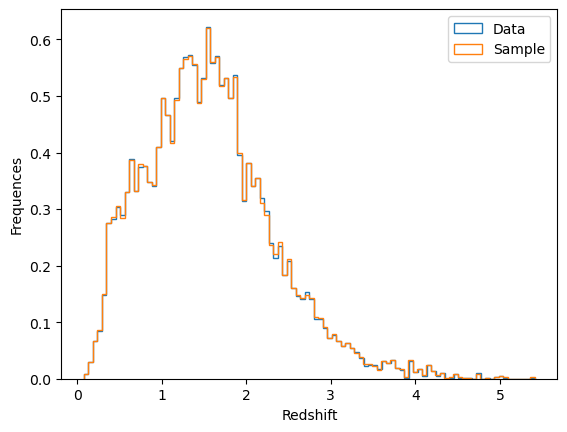

In [6]:
#confronting the data with the sampling
plt.hist(z, bins=100,density=True,histtype='step',label='Data')
plt.hist(x_good, bins=100,density=True,histtype='step',label='Sample')
plt.xlabel('Redshift')
plt.ylabel('Frequences')
plt.legend()
plt.show()

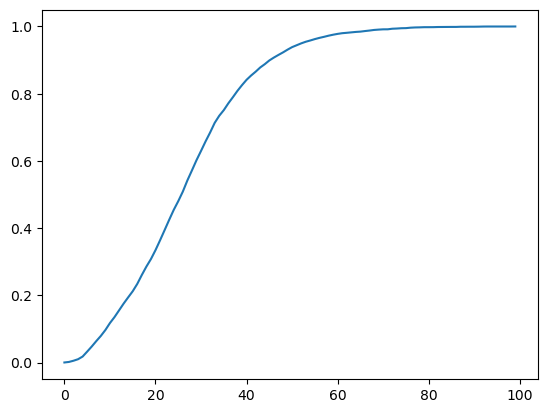

In [7]:
#INVERSE TRANSFORM SAMPLING

#cdf of histogram
cdf = np.cumsum(counts)/np.sum(counts)

plt.plot(cdf)

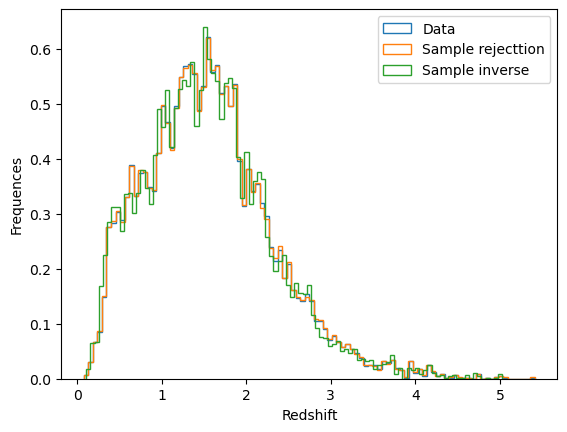

In [8]:
#distribution of value in cdf
y_cdf= np.random.uniform(min(cdf),max(cdf), 10000) 

bins_mean=[]
for i in range(0,len(bins)-1):
    bins_mean.append((bins[i] + bins[i+1]) / 2)

#to have the inverse to obtain x => interpolate cdf and evaluate y => x
inter = scipy.interpolate.interp1d(cdf, bins_mean)

x_cdf=inter(y_cdf)

plt.hist(z, bins=100,density=True,histtype='step',label='Data')
plt.hist(x_good, bins=100,density=True,histtype='step',label='Sample rejecttion')
plt.hist(x_cdf,bins=100,density=True,histtype='step',label='Sample inverse')
plt.xlabel('Redshift')
plt.ylabel('Frequences')
plt.legend()
plt.show()